# 0. library 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
import xgboost as xgb
import random

In [2]:
random.seed(30)
np.random.seed(30)

# 1. 경로 설정 및 데이터 불러오기 

In [3]:
data_path = '../DAT/'
Out_path = '../OUT/'

In [4]:
data = pd.read_csv(data_path + "paper_data.csv", )
data = data.drop(columns = data.columns[0])         # index 열 제거
data = data.drop(columns = ["time"])
data

,chla,level2.reflectance,level2.reflectance.1,level2.reflectance.2,level2.reflectance.3,level2.reflectance.4,level2.reflectance.5,level2.reflectance.6,level2.reflectance.7,level2.reflectance.8,...,level2.reflectance.541,level2.reflectance.542,level2.reflectance.543,level2.reflectance.544,level2.reflectance.545,level2.reflectance.546,level2.reflectance.547,level2.reflectance.548,level2.reflectance.549,level2.reflectance.550
0,17.7,0.003573,0.003566,0.003555,0.003544,0.003547,0.003531,0.003516,0.003492,0.003510,...,0.002818,0.002838,0.002831,0.002768,0.002772,0.002748,0.002709,0.002681,0.002623,0.002641
1,17.0,0.003179,0.003160,0.003154,0.003127,0.003132,0.003125,0.003117,0.003103,0.003118,...,0.002513,0.002551,0.002563,0.002507,0.002478,0.002414,0.002376,0.002350,0.002377,0.002398
2,16.7,0.002834,0.002829,0.002812,0.002793,0.002798,0.002779,0.002767,0.002754,0.002771,...,0.002090,0.002087,0.002058,0.001970,0.001949,0.001880,0.001790,0.001768,0.001760,0.001772
3,16.9,0.005007,0.005017,0.005010,0.004976,0.004978,0.005010,0.004979,0.005000,0.005020,...,0.004388,0.004335,0.004271,0.004125,0.004155,0.004083,0.003998,0.003986,0.003923,0.003829
4,16.9,0.004743,0.004738,0.004742,0.004715,0.004705,0.004740,0.004705,0.004737,0.004723,...,0.004023,0.003982,0.003878,0.003757,0.003800,0.003765,0.003694,0.003755,0.003706,0.003737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,10.8,0.003320,0.003302,0.003286,0.003266,0.003283,0.003281,0.003275,0.003270,0.003308,...,0.002422,0.002447,0.002364,0.002013,0.002037,0.001902,0.001774,0.001780,0.001810,0.001959
480,10.2,0.003146,0.003142,0.003141,0.003134,0.003146,0.003154,0.003145,0.003151,0.003189,...,0.002143,0.002171,0.002096,0.001753,0.001794,0.001629,0.001465,0.001514,0.001482,0.001616
481,6.4,0.007399,0.007392,0.007383,0.007367,0.007351,0.007398,0.007374,0.007405,0.007426,...,0.005095,0.005090,0.005078,0.004910,0.004850,0.004705,0.004622,0.004618,0.004626,0.004714
482,7.0,0.009519,0.009479,0.009471,0.009433,0.009459,0.009429,0.009446,0.009419,0.009478,...,0.006855,0.006788,0.006641,0.006398,0.006406,0.006347,0.006227,0.006226,0.006110,0.006068


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


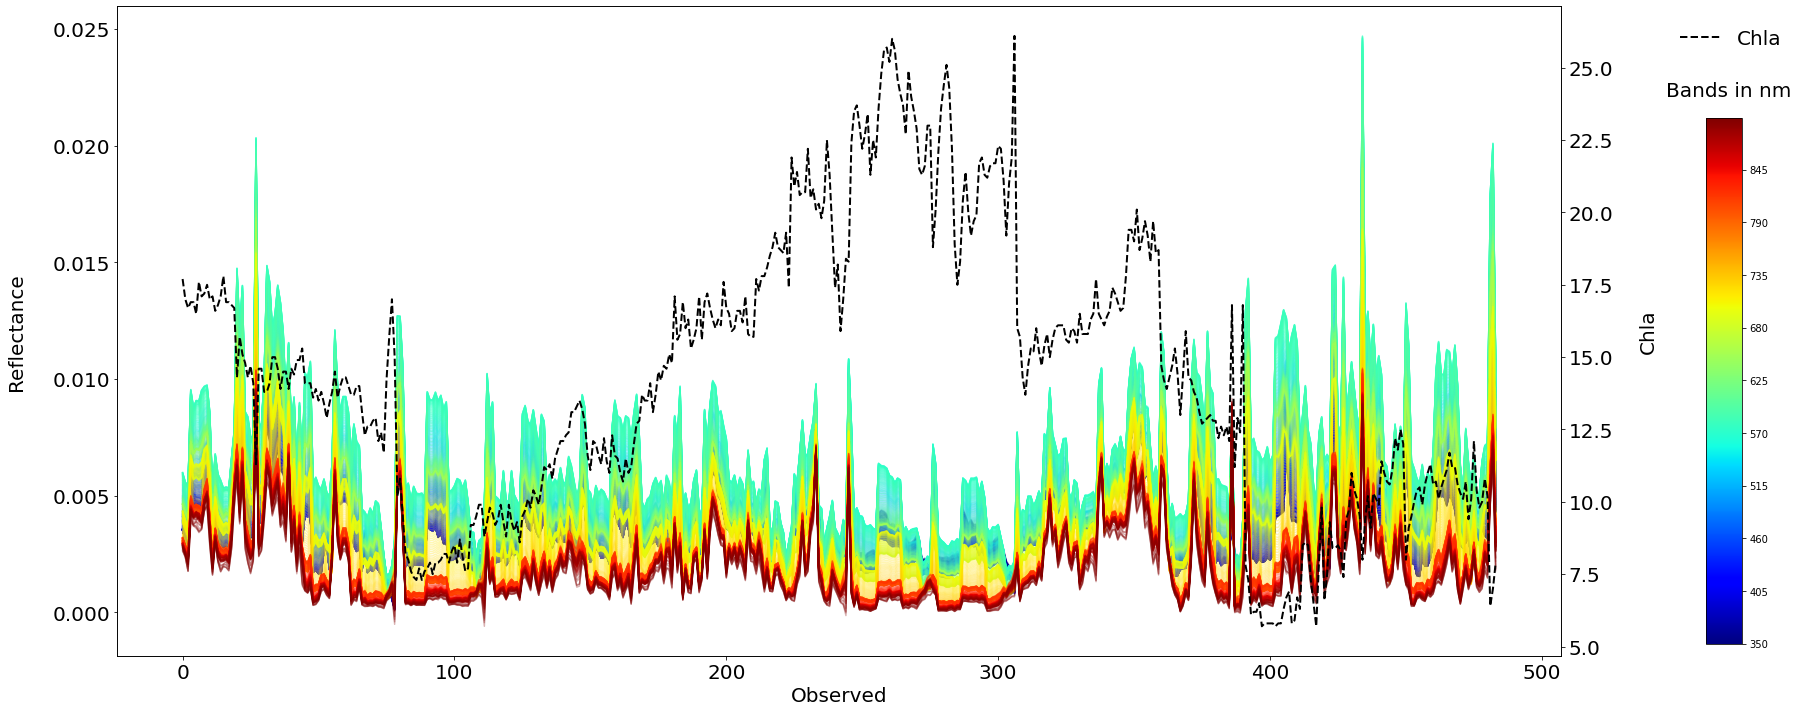

In [5]:
import matplotlib as mpl

cmap = plt.get_cmap('jet', 551)

fig = plt.figure(figsize = (25, 10)) 
ax1 = fig.subplots()

ax1.set_xlabel('Observed', fontsize = 20)
ax1.set_ylabel('Reflectance\n', fontsize = 20)
for i in range(1, data.shape[1]) :
    ax1.plot(data.iloc[:,i], c = cmap(i), alpha = 0.3)
ax1.tick_params(axis = 'y', labelsize = 20) 
ax1.tick_params(axis = 'x', labelsize = 20) 


# right side with different scale
ax2 = ax1.twinx() # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('\nChla', fontsize = 20)
ax2.plot(data.iloc[:,0], color = "black", linewidth = 2, label = "Chla", linestyle = "--")
ax2.tick_params(axis = 'y', labelsize = 20) 
ax2.legend(loc = 'center left', bbox_to_anchor = (1.07, 0.95), fontsize = 20, frameon = False)

ax3  = fig.add_axes([0.95, 0.10, 0.02, 0.73])
norm = mpl.colors.Normalize(vmin = 0, vmax = 2)
cb  = mpl.colorbar.ColorbarBase(ax3, cmap = cmap, orientation = 'vertical', boundaries = np.arange(350, 900, 1))
cb.set_label('Bands in nm', labelpad = -40, y = 1.07, rotation = 0, fontsize = 20)

plt.tight_layout()
plt.show()

In [6]:
band_max = list(data.iloc[:, 1:].apply(lambda x : max(x)).values)
band_min = list(data.iloc[:, 1:].apply(lambda x : min(x)).values)
band_mean = list(data.iloc[:, 1:].apply(lambda x : x.mean()).values)

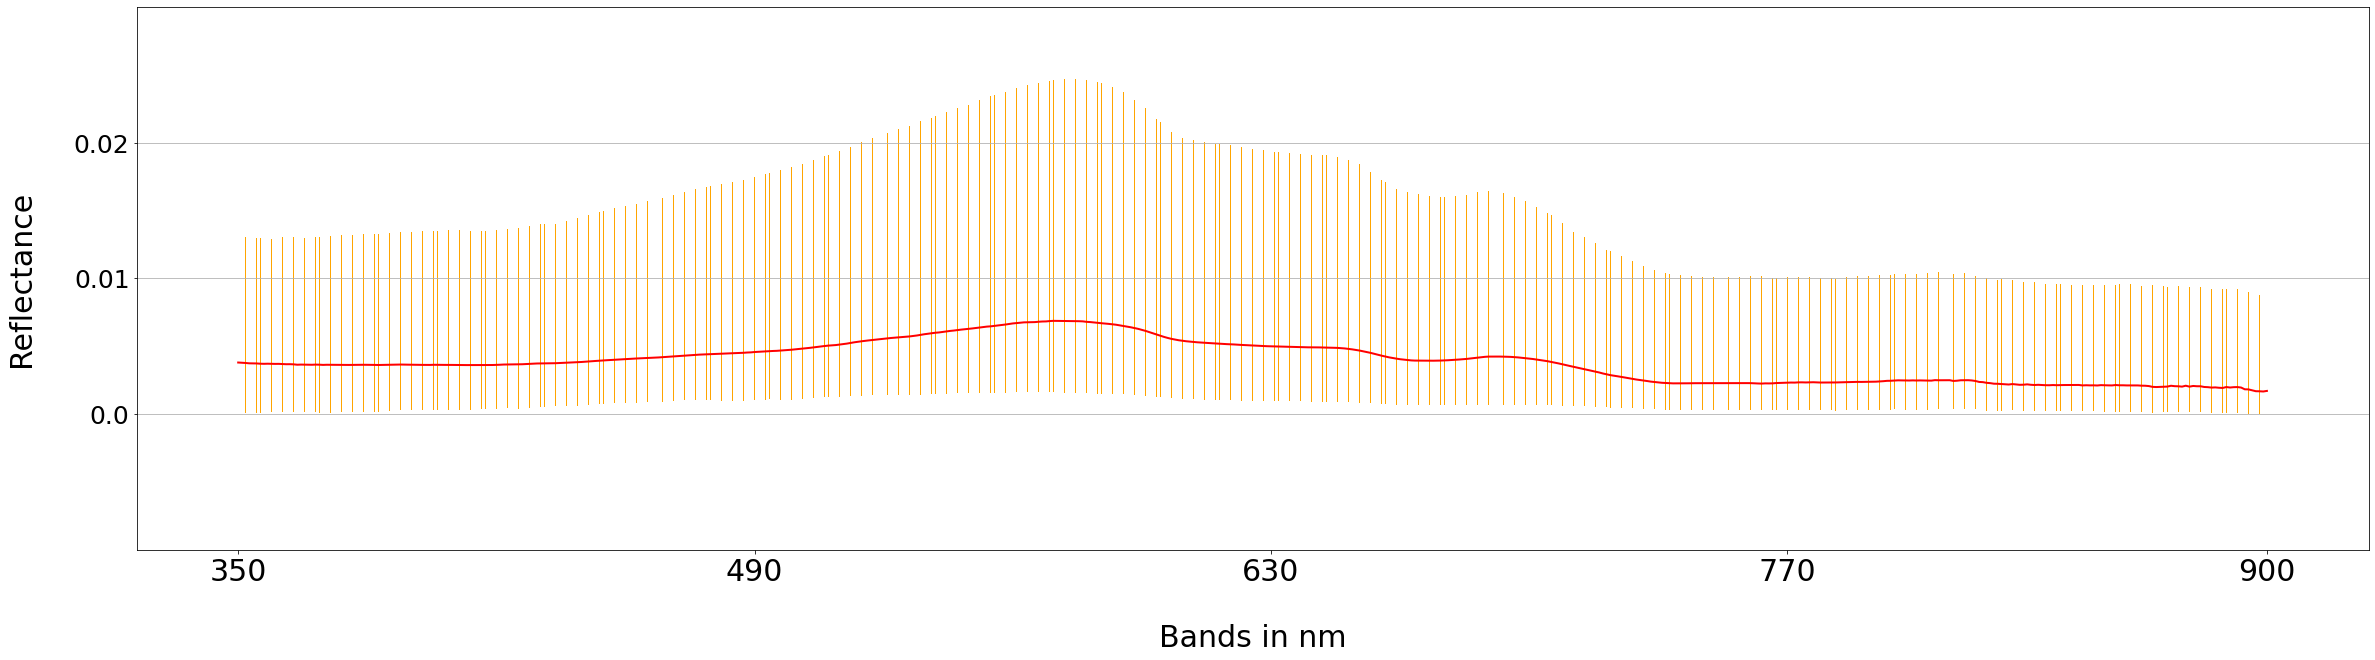

In [7]:
plt.figure(figsize = (40, 10)) 
#  fig.add_subplot()

plt.bar(x = range(350, 901), height = band_max, color = "orange", width = 0.1)
plt.bar(x = range(350, 901), height = band_min, color = "white", width = 0.1)
plt.plot(range(350, 901), band_mean, color = "red", linewidth = 2)
plt.ylim(-0.01, 0.03)
plt.xticks([350, 490, 630, 770, 900], [350, 490, 630, 770, 900], fontsize = 30)
plt.yticks([0.000, 0.010, 0.020], [0.000, 0.01, 0.02], fontsize = 25)
plt.ylabel("Reflectance\n", fontsize = 30)
plt.xlabel("\nBands in nm", fontsize = 30)
plt.grid(True, axis = "y")

plt.show()

# 2. 데이터 나누기

In [8]:
X = data.iloc[:, 1:]
y = data.iloc[:, 0]

print(X.shape, y.shape)


cnt = np.floor(X.shape[0] * 0.7).astype(int)
train_X = X.iloc[:cnt, :].reset_index(drop = True)
train_y = y.iloc[:cnt].reset_index(drop = True)
test_X = X.iloc[cnt:, :].reset_index(drop = True)
test_y = y.iloc[cnt:].reset_index(drop = True)

print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(484, 551) (484,)
(338, 551) (338,) (146, 551) (146,)


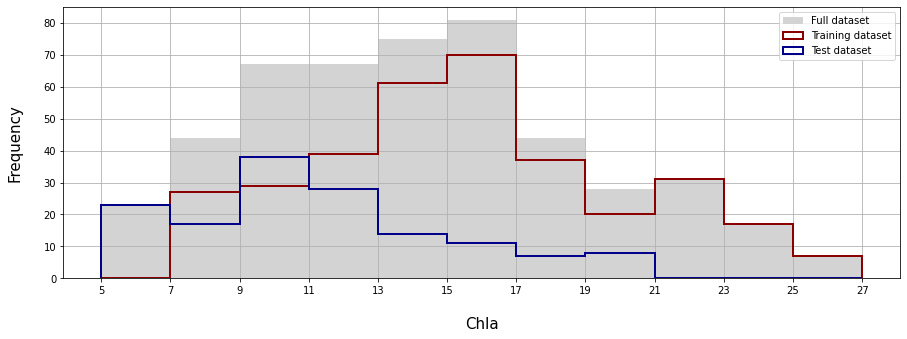

In [66]:
import seaborn as sns

plt.figure(figsize = (15, 5))
plt.hist(y, color = "lightgrey", label = "Full dataset", bins = list(range(5,29,2)))
plt.hist(train_y, histtype = 'step', color = "darkred", lw = 2, label = "Training dataset", bins = list(range(5,29,2)))
plt.hist(test_y, histtype = 'step', color = "darkblue", lw = 2, label = "Test dataset", bins = list(range(5,29,2)))
plt.xticks(list(range(5,29,2)), list(range(5,29,2)))
plt.grid(True)
plt.ylabel("Frequency\n", fontsize = 15)
plt.xlabel("\nChla", fontsize = 15)
plt.legend(loc = 'upper right')
plt.show()

In [9]:
# ### PLS
# from sklearn.preprocessing import StandardScaler
# from sklearn import model_selection
# from sklearn.model_selection import RepeatedKFold
# from sklearn.metrics import mean_squared_error
# from sklearn.cross_decomposition import PLSRegression
# from tqdm.notebook import tqdm

# train_data = pd.concat([train_X, train_y], axis = 1)
# st_train_data = StandardScaler().fit_transform(train_data)
# st_train_data = pd.DataFrame(st_train_data)
# pls_X = st_train_data.iloc[:, 1:]
# pls_y = st_train_data.iloc[:, 0]

# cv = RepeatedKFold(n_splits = 10, n_repeats = 3, random_state = 1)
# mse = []
# n = len(pls_X)

# for i in tqdm(np.arange(1, 30)) :
#     pls = PLSRegression(n_components = i)
#     score = -1*model_selection.cross_val_score(pls, pls_X, pls_y, cv = cv,
#                                               scoring = 'neg_mean_squared_error').mean()
#     mse.append(score)

In [10]:
# plt.figure(figsize = (10, 5))
# plt.plot(mse, marker = "o")
# plt.show()

# print("Min MSE Index : ", mse.index(min(mse)) + 1)
# pls_bc = 5

# **0. 표준화 함수**

In [11]:
def HS_st(train_X, test_X, train_y, method, head = None, tail = None) :

  train_X = train_X.iloc[:, head : -tail]
  test_X = test_X.iloc[:, head : -tail]

  ### None
  if method == "none" or method == "None" :
    st_train_X = train_X
    st_test_X = test_X

  ### StandardScaler
  elif method == "StandardScaler" or method == "SS" :
    from sklearn.preprocessing import StandardScaler
    std_scale = StandardScaler().fit(train_X)
    
    st_train_X = std_scale.transform(train_X)
    st_test_X = std_scale.transform(test_X)
    # print(st_train_X.shape,  st_test_X.shape)

  ### MinMaxScaler
  elif method == "MinMaxScaler" or method == "MM" :
    from sklearn.preprocessing import MinMaxScaler
    mm_scale = MinMaxScaler().fit(train_X)

    st_train_X = mm_scale.transform(train_X)
    st_test_X = mm_scale.transform(test_X)
    # print(st_train_X.shape,  st_test_X.shape)

  ### PCA
  elif method == "pca" or method == "PCA" :
    from sklearn.preprocessing import StandardScaler
    from sklearn.decomposition import PCA
    from itertools import accumulate

    std_scale = StandardScaler().fit(train_X)
    st_train_X = std_scale.transform(train_X)
    st_test_X = std_scale.transform(test_X)

    # 주성분 개수 결정
    pca = PCA(n_components = 10).fit(st_train_X) 
    cum_var = list(accumulate(pca.explained_variance_ratio_)) 
    pca_idx = np.where(np.array(cum_var) > 0.999)[0][0] + 1

    # 결정된 comp로 주성분 분석
    pca = PCA(n_components = pca_idx, random_state = 99).fit(st_train_X)

    st_train_X = pca.transform(st_train_X)
    st_train_X = pd.DataFrame(st_train_X)

    st_test_X = pca.transform(st_test_X)
    st_test_X = pd.DataFrame(st_test_X)
    # print(st_train_X.shape,  st_test_X.shape)


  ### PLS
  elif method == "pls" or method ==  "PLS" :
    from sklearn.preprocessing import StandardScaler
    from sklearn.cross_decomposition import PLSRegression

    st_train_y = (train_y - train_y.mean()) / train_y.std()
    std_scale = StandardScaler().fit(train_X)
    st_train_X = std_scale.transform(train_X)
    st_test_X = std_scale.transform(test_X)
  
    pls_fit = PLSRegression(n_components = 5).fit(st_train_X, st_train_y)

    pls_train_transform = pls_fit.transform(st_train_X)
    st_train_X = pd.DataFrame(pls_train_transform)

    pls_test_transform = pls_fit.transform(st_test_X)
    st_test_X = pd.DataFrame(pls_test_transform)    
    
    # print(st_train_X.shape,  st_test_X.shape)

  return {"train X" : st_train_X, "test X" : st_test_X}

# **- 평가지표 (R2, MAPE, MSE)**

In [12]:
def R2(true, pred) :
  import numpy as np
  sse = ((np.array(true) - np.array(pred))**2).sum()
  ssr = ((np.array(pred) - np.mean(true))**2).sum()
  sst = ((np.array(true) - np.mean(true))**2).sum()
  # r2 = 1 - (sse/sst)
  r2 = ssr/sst
  return np.round(r2, 3)

In [13]:
def MAPE(true, pred) :
  import numpy as np
  mape = np.mean(np.abs((np.array(true) - np.array(pred)) / np.array(true))) * 100
  return np.round(mape, 3)

In [14]:
def MSE(true, pred) :
  import numpy as np
  mse = np.mean((np.array(true) - np.array(pred))**2)
  return np.round(mse, 3)

In [15]:
def NSE(true, pred):
    import numpy as np
    nse = 1-(np.sum((np.array(true)-np.array(pred))**2)/np.sum((np.array(true)-np.mean(true))**2))
    return np.round(nse, 3)

In [16]:
def d(true,pred):
    import numpy as np
    d = 1-(np.sum((np.array(true)-np.array(pred))**2)/np.sum((np.abs(np.array(pred)-np.mean(true))+np.abs(np.array(true)-np.mean(true)))**2))
    return np.round(d,3)

In [17]:
def MAE(true,pred):
    import numpy as np
    mae = np.mean(np.abs((np.array(true) - np.array(pred))**2))
    return np.round(mae,3)

In [18]:
def RMSE(true,pred):
    import numpy as np
    rmse = np.sqrt(np.mean((np.array(true) - np.array(pred))**2))
    return np.round(rmse,3)

In [19]:
def PSR(true,pred):
    import numpy as np
    psr = np.sqrt(np.sum((np.array(true)-np.array(pred))**2)/np.sum((np.array(true)-np.mean(pred))**2))
    return np.round(psr,3)

In [20]:
np.sqrt(2)

1.4142135623730951

# **1. OLS**

In [21]:
import statsmodels.api as sm

standard_method = ["None", "SS", "MM", "PCA", "PLS"]
OLS_pred_list= []
OLS_r2_list = []

for i in range(len(standard_method)) : 
  st = HS_st(train_X = train_X, test_X = test_X, train_y = train_y, 
             method = standard_method[i],
             head = 50, tail = 50)
  st_train_X = st["train X"]  ; st_test_X = st["test X"]
  print(standard_method[i], " : ", st_train_X.shape, st_test_X.shape)
  reg = sm.OLS(train_y, st_train_X,random_state=30).fit()
  reg_pred = reg.predict(st_test_X)
  OLS_pred_list.append(reg_pred)

  reg_pred_r2 = sm.OLS(test_y, reg_pred).fit().rsquared
  OLS_r2_list.append(reg_pred_r2)

None  :  (338, 451) (146, 451)
SS  :  (338, 451) (146, 451)
MM  :  (338, 451) (146, 451)
PCA  :  (338, 5) (146, 5)
PLS  :  (338, 5) (146, 5)


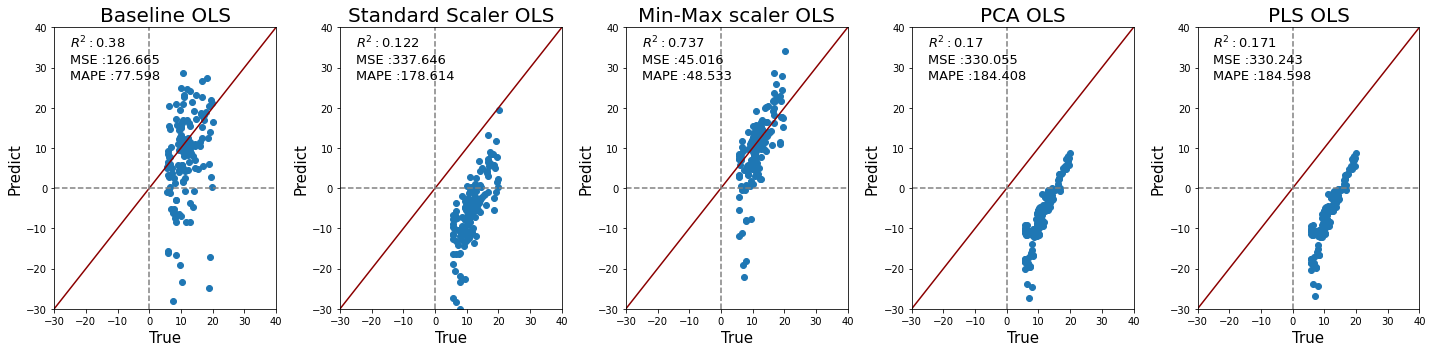

In [22]:
from sklearn.metrics import r2_score

standard_method = ["None", "SS", "MM", "PCA", "PLS"]
method_name = ["Baseline", "Standard Scaler", "Min-Max scaler", "PCA", "PLS"]

plt.figure(figsize = (20, 5))

for i in range(5) :
    plt.subplot(1, 5, i+1)
    plt.scatter(test_y, OLS_pred_list[i])
    plt.plot([-30, 40], [-30, 40], color = "darkred")
    plt.axhline(0, color = "grey", linestyle = "--")  ; plt.axvline(0, color = "grey", linestyle = "--")
    plt.xlim(-30, 40) ; plt.ylim(-30, 40)
    plt.xlabel("True", fontsize = 15)  ; plt.ylabel("Predict", fontsize = 15)
    plt.text(-25, 35, r'$R^2 :$' + str(np.round(OLS_r2_list[i], 3)), fontsize = 13)
    plt.text(-25, 31, "MSE :" + str(MSE(true = test_y, pred = OLS_pred_list[i])), fontsize = 13)
    plt.text(-25, 27, "MAPE :" + str(MAPE(true = test_y, pred = OLS_pred_list[i])), fontsize = 13)
    plt.title(method_name[i] + " OLS", fontsize = 20)

plt.tight_layout()
plt.savefig(Out_path + 'OLS.png')
plt.show()

# **2. Random Forest**

In [23]:
from sklearn.ensemble import RandomForestRegressor as RF

standard_method = ["None", "SS", "MM", "PCA", "PLS"]
RF_pred_list= []
RF_r2_list = []

for i in range(len(standard_method)) : 
  st = HS_st(train_X = train_X, test_X = test_X, train_y = train_y, 
             method = standard_method[i],
             head = 50, tail = 50)
  st_train_X = st["train X"]  ; st_test_X = st["test X"]
  print(standard_method[i], " : ", st_train_X.shape, st_test_X.shape)
  rf = RF(random_state=30).fit(st_train_X, train_y)
  rf_pred = rf.predict(st_test_X)
  RF_pred_list.append(rf_pred)

  reg_pred_r2 = sm.OLS(test_y, rf_pred).fit().rsquared
  RF_r2_list.append(reg_pred_r2)

None  :  (338, 451) (146, 451)
SS  :  (338, 451) (146, 451)
MM  :  (338, 451) (146, 451)
PCA  :  (338, 5) (146, 5)
PLS  :  (338, 5) (146, 5)


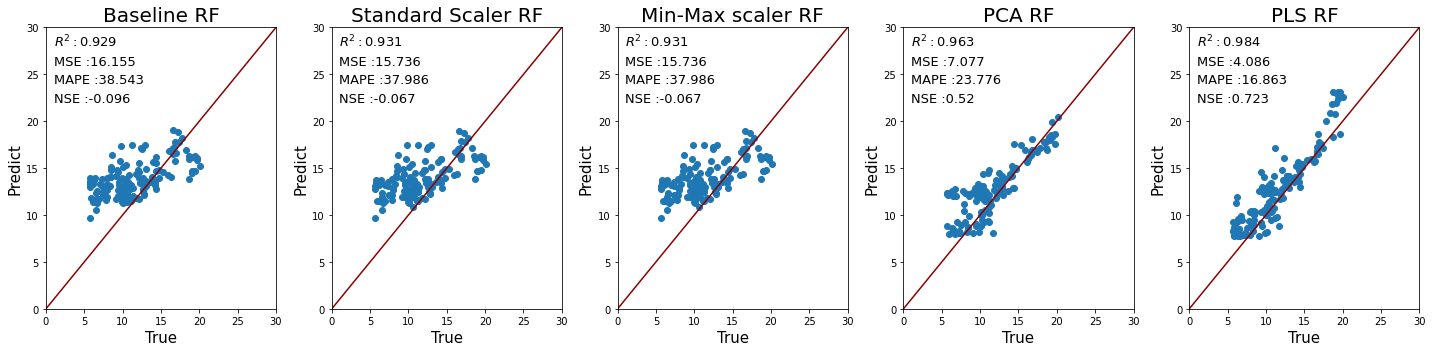

In [24]:
## from sklearn.metrics import r2_score

standard_method = ["None", "SS", "MM", "PCA", "PLS"]

plt.figure(figsize = (20, 5))

for i in range(5) :
    plt.subplot(1, 5, i+1)
    plt.scatter(test_y, RF_pred_list[i])
    plt.plot([0, 30], [0, 30], color = "darkred")
    plt.xlim(0, 30) ; plt.ylim(0, 30)
    plt.xlabel("True", fontsize = 15)  ; plt.ylabel("Predict", fontsize = 15)
    plt.text(1, 28, r'$R^2 :$' + str(np.round(RF_r2_list[i], 3)), fontsize = 13)
    plt.text(1, 26, "MSE :" + str(MSE(true = test_y, pred = RF_pred_list[i])), fontsize = 13)
    plt.text(1, 24, "MAPE :" + str(MAPE(true = test_y, pred = RF_pred_list[i])), fontsize = 13)
    plt.text(1, 22, "NSE :" + str(NSE(true = test_y, pred = RF_pred_list[i])), fontsize = 13)
    plt.title(method_name[i] + " RF", fontsize = 20)

plt.tight_layout()
plt.savefig(Out_path + 'RF.png')
plt.show()

# **3. Extremly Tree**

In [25]:
from sklearn.ensemble import ExtraTreesRegressor as ET

standard_method = ["None", "SS", "MM", "PCA", "PLS"]
ET_pred_list= []
ET_r2_list = []

for i in range(len(standard_method)) : 
  st = HS_st(train_X = train_X, test_X = test_X, train_y = train_y, 
             method = standard_method[i],
             head = 50, tail = 50)
  st_train_X = st["train X"]  ; st_test_X = st["test X"]
  print(standard_method[i], " : ", st_train_X.shape, st_test_X.shape)
  et = ET(random_state=30).fit(st_train_X, train_y)
  et_pred = et.predict(st_test_X)
  ET_pred_list.append(et_pred)

  reg_pred_r2 = sm.OLS(test_y, et_pred).fit().rsquared
  ET_r2_list.append(reg_pred_r2)

None  :  (338, 451) (146, 451)
SS  :  (338, 451) (146, 451)
MM  :  (338, 451) (146, 451)
PCA  :  (338, 5) (146, 5)
PLS  :  (338, 5) (146, 5)


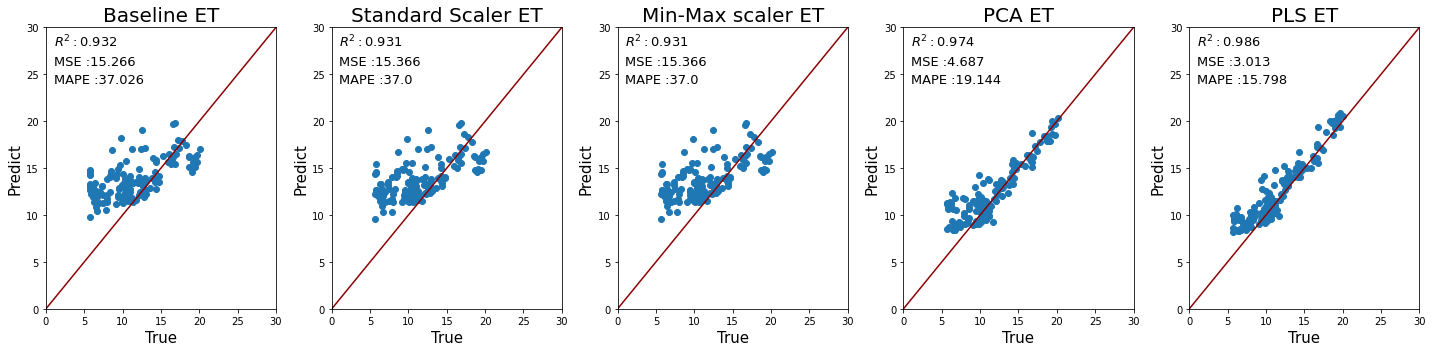

In [26]:
from sklearn.metrics import r2_score

standard_method = ["None", "SS", "MM", "PCA", "PLS"]

plt.figure(figsize = (20, 5))

for i in range(5) :
    plt.subplot(1, 5, i+1)
    plt.scatter(test_y, ET_pred_list[i])
    plt.plot([0, 30], [0, 30], color = "darkred")
    plt.xlim(0, 30) ; plt.ylim(0, 30)
    plt.xlabel("True", fontsize = 15)  ; plt.ylabel("Predict", fontsize = 15)
    plt.text(1, 28, r'$R^2 :$' + str(np.round(ET_r2_list[i], 3)), fontsize = 13)
    plt.text(1, 26, "MSE :" + str(MSE(true = test_y, pred = ET_pred_list[i])), fontsize = 13)
    plt.text(1, 24, "MAPE :" + str(MAPE(true = test_y, pred = ET_pred_list[i])), fontsize = 13)    
    plt.title(method_name[i] + " ET", fontsize = 20)

plt.tight_layout()
plt.savefig(Out_path + 'ET.png')
plt.show()

# **4. GradientBoost**

In [27]:
GB_pred = []
gb_r2 = []
standard_method = ["None", "SS", "MM", "PCA", "PLS"]

for i in range(len(standard_method)):
    st = HS_st(train_X = train_X, test_X = test_X, train_y = train_y, 
             method = standard_method[i],
             head = 50, tail = 50)
    st_train_X = st["train X"]  ; st_test_X = st["test X"]
    print(standard_method[i], " : ", st_train_X.shape, st_test_X.shape)
    grbt = GradientBoostingRegressor(random_state=30)
    grbt.fit(st_train_X, train_y)
    grbt_pred = grbt.predict(st_test_X)
    GB_pred.append(grbt_pred)
    
    pred_r2 = sm.OLS(test_y, grbt_pred).fit().rsquared
    gb_r2.append(pred_r2)

None  :  (338, 451) (146, 451)
SS  :  (338, 451) (146, 451)
MM  :  (338, 451) (146, 451)
PCA  :  (338, 5) (146, 5)
PLS  :  (338, 5) (146, 5)


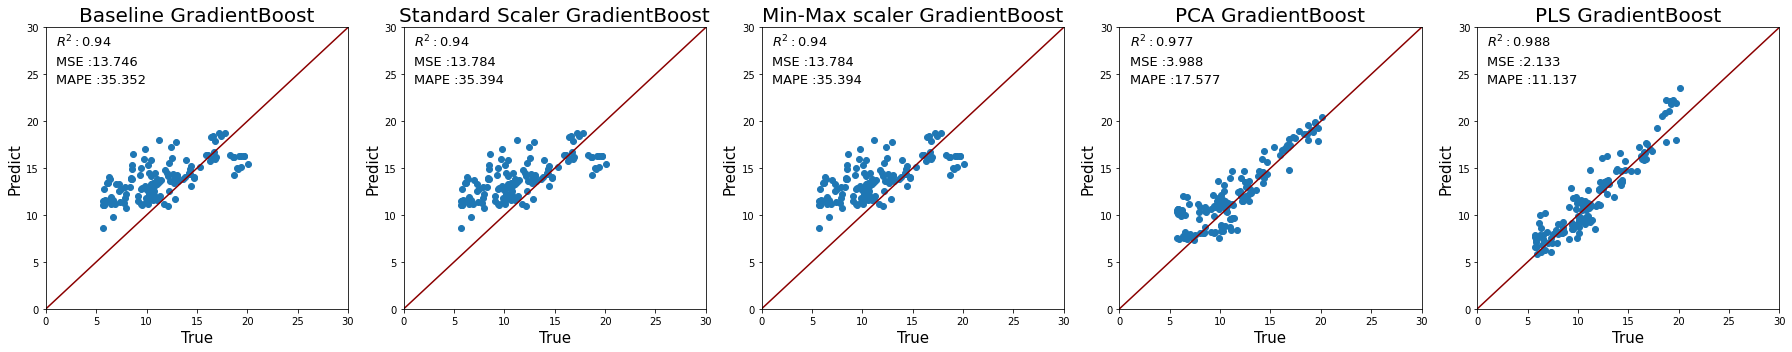

In [28]:
from sklearn.metrics import r2_score

standard_method = ["None", "SS", "MM", "PCA", "PLS"]

plt.figure(figsize = (25, 5))

for i in range(5) :
  plt.subplot(1, 5, i+1)
  plt.scatter(test_y, GB_pred[i])
  plt.plot([0, 30], [0, 30], color = "darkred")
  plt.xlim(0, 30) ; plt.ylim(0, 30)
  plt.xlabel("True", fontsize = 15)  ; plt.ylabel("Predict", fontsize = 15)
  plt.text(1, 28, r'$R^2 :$' + str(np.round(gb_r2[i], 3)), fontsize = 13)
  plt.text(1, 26, "MSE :" + str(MSE(true = test_y, pred = GB_pred[i])), fontsize = 13)
  plt.text(1, 24, "MAPE :" + str(MAPE(true = test_y, pred = GB_pred[i])), fontsize = 13)
  plt.title(method_name[i] + " GradientBoost", fontsize = 20)

plt.tight_layout()
plt.savefig(Out_path + 'GB.png')
plt.show()

# **5. Adaboost**

In [29]:
ada_pred = []
AD_r2 = []
standard_method = ["None", "SS", "MM", "PCA", "PLS"]

for i in range(len(standard_method)):
    st = HS_st(train_X = train_X, test_X = test_X, train_y = train_y, 
             method = standard_method[i],
             head = 50, tail = 50)
    st_train_X = st["train X"]  ; st_test_X = st["test X"]
    print(standard_method[i], " : ", st_train_X.shape, st_test_X.shape)
    adab = AdaBoostRegressor(random_state=30)
    adab.fit(st_train_X, train_y)
    adab_pred = adab.predict(st_test_X)
    ada_pred.append(adab_pred)
    
    pred_r2_ada = sm.OLS(test_y, adab_pred).fit().rsquared
    AD_r2.append(pred_r2_ada)

None  :  (338, 451) (146, 451)
SS  :  (338, 451) (146, 451)
MM  :  (338, 451) (146, 451)
PCA  :  (338, 5) (146, 5)
PLS  :  (338, 5) (146, 5)


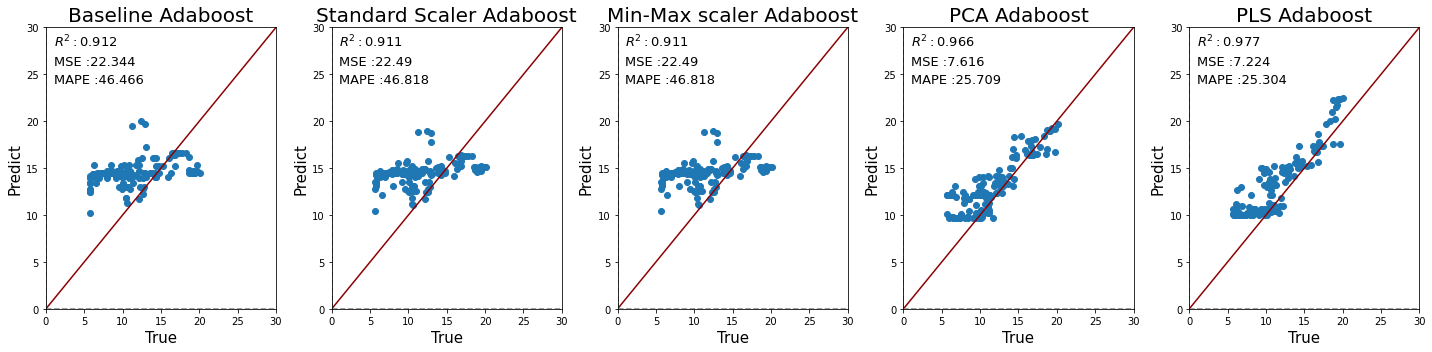

In [30]:
plt.figure(figsize = (20, 5))

for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.scatter(test_y, ada_pred[i])
    plt.plot([0, 30], [0, 30], color = "darkred")
    plt.axhline(0, color = "grey", linestyle = "--")  ; plt.axvline(0, color = "grey", linestyle = "--")
    plt.xlim(0, 30) ; plt.ylim(0, 30)
    plt.xlabel("True", fontsize = 15)  ; plt.ylabel("Predict", fontsize = 15)
    plt.text(1, 28, r'$R^2 :$' + str(np.round(AD_r2[i], 3)), fontsize = 13)
    plt.text(1, 26, "MSE :" + str(MSE(true = test_y, pred = ada_pred[i])), fontsize = 13)
    plt.text(1, 24, "MAPE :" + str(MAPE(true = test_y, pred = ada_pred[i])), fontsize = 13)
    plt.title(method_name[i] + " Adaboost", fontsize = 20)

plt.tight_layout()
plt.savefig(Out_path + 'Adaboost.png')
plt.show()

# **6. KNN**

In [31]:
knn_pred = []
KN_r2 = []
standard_method = ["None", "SS", "MM", "PCA", "PLS"]

for i in range(len(standard_method)):
    st = HS_st(train_X = train_X, test_X = test_X, train_y = train_y, 
             method = standard_method[i],
             head = 50, tail = 50)
    st_train_X = st["train X"]  ; st_test_X = st["test X"]
    print(standard_method[i], " : ", st_train_X.shape, st_test_X.shape)
    knn = KNeighborsRegressor(n_neighbors = 3)
    knn.fit(st_train_X, train_y)
    kn_pred = knn.predict(st_test_X)
    knn_pred.append(kn_pred)
    
    pred_r2_kn = sm.OLS(test_y, kn_pred).fit().rsquared
    KN_r2.append(pred_r2_kn)

None  :  (338, 451) (146, 451)
SS  :  (338, 451) (146, 451)
MM  :  (338, 451) (146, 451)
PCA  :  (338, 5) (146, 5)
PLS  :  (338, 5) (146, 5)


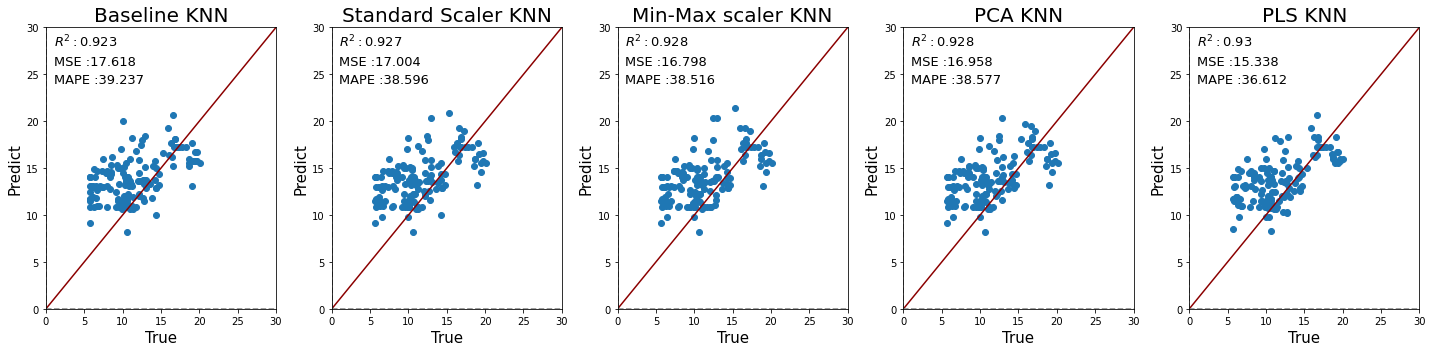

In [32]:
plt.figure(figsize = (20, 5))

for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.scatter(test_y, knn_pred[i])
    plt.plot([0, 30], [0, 30], color = "darkred")
    plt.axhline(0, color = "grey", linestyle = "--")  ; plt.axvline(0, color = "grey", linestyle = "--")
    plt.xlim(0, 30) ; plt.ylim(0, 30)
    plt.xlabel("True", fontsize = 15)  ; plt.ylabel("Predict", fontsize = 15)
    plt.text(1, 28, r'$R^2 :$' + str(np.round(KN_r2[i], 3)), fontsize = 13)
    plt.text(1, 26, "MSE :" + str(MSE(true = test_y, pred = knn_pred[i])), fontsize = 13)
    plt.text(1, 24, "MAPE :" + str(MAPE(true = test_y, pred = knn_pred[i])), fontsize = 13)
    plt.title(method_name[i] + " KNN", fontsize = 20)

plt.tight_layout()
plt.savefig(Out_path + 'KNN.png')
plt.show()

# **7. SVR**

In [33]:
svr_pred = []
SVR_r2 = []
standard_method = ["None", "SS", "MM", "PCA", "PLS"]

for i in range(len(standard_method)):
    st = HS_st(train_X = train_X, test_X = test_X, train_y = train_y, 
             method = standard_method[i],
             head = 50, tail = 50)
    st_train_X = st["train X"]  ; st_test_X = st["test X"]
    print(standard_method[i], " : ", st_train_X.shape, st_test_X.shape)
    svr = SVR()
    svr.fit(st_train_X, train_y)
    sv_pred = svr.predict(st_test_X)
    svr_pred.append(sv_pred)
    
    pred_r2_sv = sm.OLS(test_y, sv_pred).fit().rsquared
    SVR_r2.append(pred_r2_sv)

None  :  (338, 451) (146, 451)
SS  :  (338, 451) (146, 451)
MM  :  (338, 451) (146, 451)
PCA  :  (338, 5) (146, 5)
PLS  :  (338, 5) (146, 5)


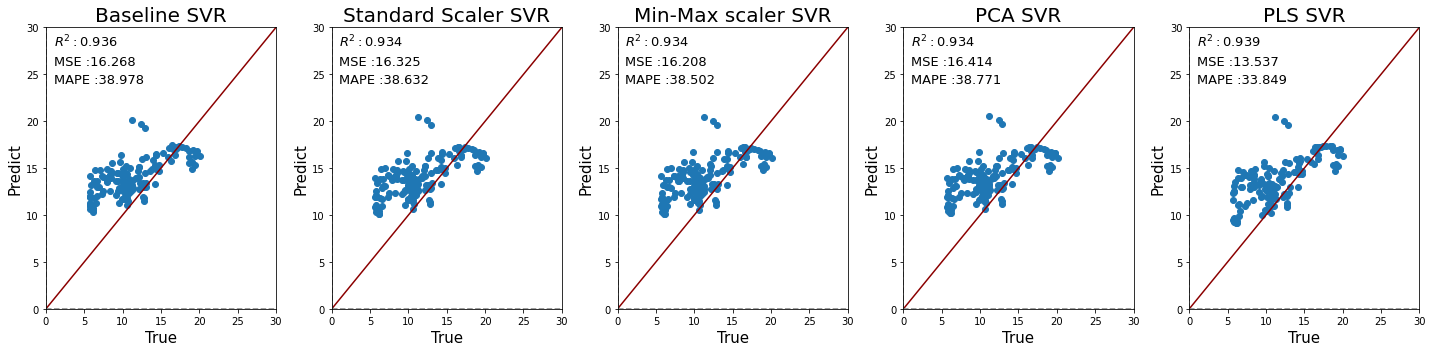

In [34]:
plt.figure(figsize = (20, 5))

for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.scatter(test_y, svr_pred[i])
    plt.plot([0, 30], [0, 30], color = "darkred")
    plt.axhline(0, color = "grey", linestyle = "--")  ; plt.axvline(0, color = "grey", linestyle = "--")
    plt.xlim(0, 30) ; plt.ylim(0, 30)
    plt.xlabel("True", fontsize = 15)  ; plt.ylabel("Predict", fontsize = 15)
    plt.text(1, 28, r'$R^2 :$' + str(np.round(SVR_r2[i], 3)), fontsize = 13)
    plt.text(1, 26, "MSE :" + str(MSE(true = test_y, pred = svr_pred[i])), fontsize = 13)
    plt.text(1, 24, "MAPE :" + str(MAPE(true = test_y, pred = svr_pred[i])), fontsize = 13)
    plt.title(method_name[i] + " SVR", fontsize = 20)

plt.tight_layout()
plt.savefig(Out_path + 'SVR.png')
plt.show()

# **8. XGboost**

In [35]:
xgb_pred = []
XGB_r2 = []
standard_method = ["None", "SS", "MM", "PCA", "PLS"]

for i in range(len(standard_method)):
    st = HS_st(train_X = train_X, test_X = test_X, train_y = train_y, 
             method = standard_method[i],
             head = 50, tail = 50)
    st_train_X = st["train X"]  ; st_test_X = st["test X"]
    print(standard_method[i], " : ", st_train_X.shape, st_test_X.shape)
    xgb = XGBRegressor(random_state=30)
    xgb.fit(st_train_X, train_y)
    xg_pred = xgb.predict(st_test_X)
    xgb_pred.append(xg_pred)
    
    pred_r2_xgb = sm.OLS(test_y, xg_pred).fit().rsquared
    XGB_r2.append(pred_r2_xgb)

None  :  (338, 451) (146, 451)
SS  :  (338, 451) (146, 451)
MM  :  (338, 451) (146, 451)
PCA  :  (338, 5) (146, 5)
PLS  :  (338, 5) (146, 5)


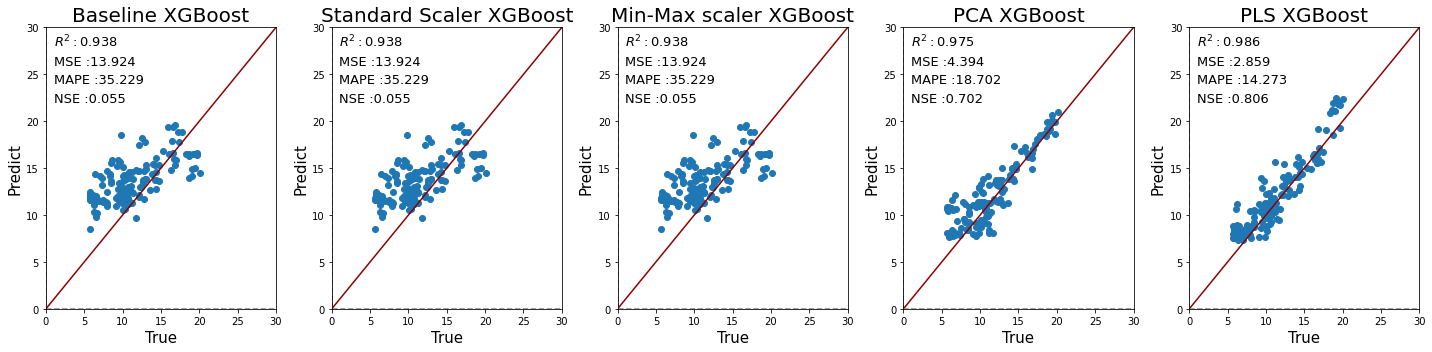

In [36]:
plt.figure(figsize = (20, 5))

for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.scatter(test_y, xgb_pred[i])
    plt.plot([0, 30], [0, 30], color = "darkred")
    plt.axhline(0, color = "grey", linestyle = "--")  ; plt.axvline(0, color = "grey", linestyle = "--")
    plt.xlim(0, 30) ; plt.ylim(0, 30)
    plt.xlabel("True", fontsize = 15)  ; plt.ylabel("Predict", fontsize = 15)
    plt.text(1, 28, r'$R^2 :$' + str(np.round(XGB_r2[i], 3)), fontsize = 13)
    plt.text(1, 26, "MSE :" + str(MSE(true = test_y, pred = xgb_pred[i])), fontsize = 13)
    plt.text(1, 24, "MAPE :" + str(MAPE(true = test_y, pred = xgb_pred[i])), fontsize = 13)
    plt.text(1, 22, "NSE :" + str(NSE(true = test_y, pred = xgb_pred[i])), fontsize = 13)
    plt.title(method_name[i] + " XGBoost", fontsize = 20)

plt.tight_layout()
plt.savefig(Out_path + 'XGBoost.png')
plt.show()

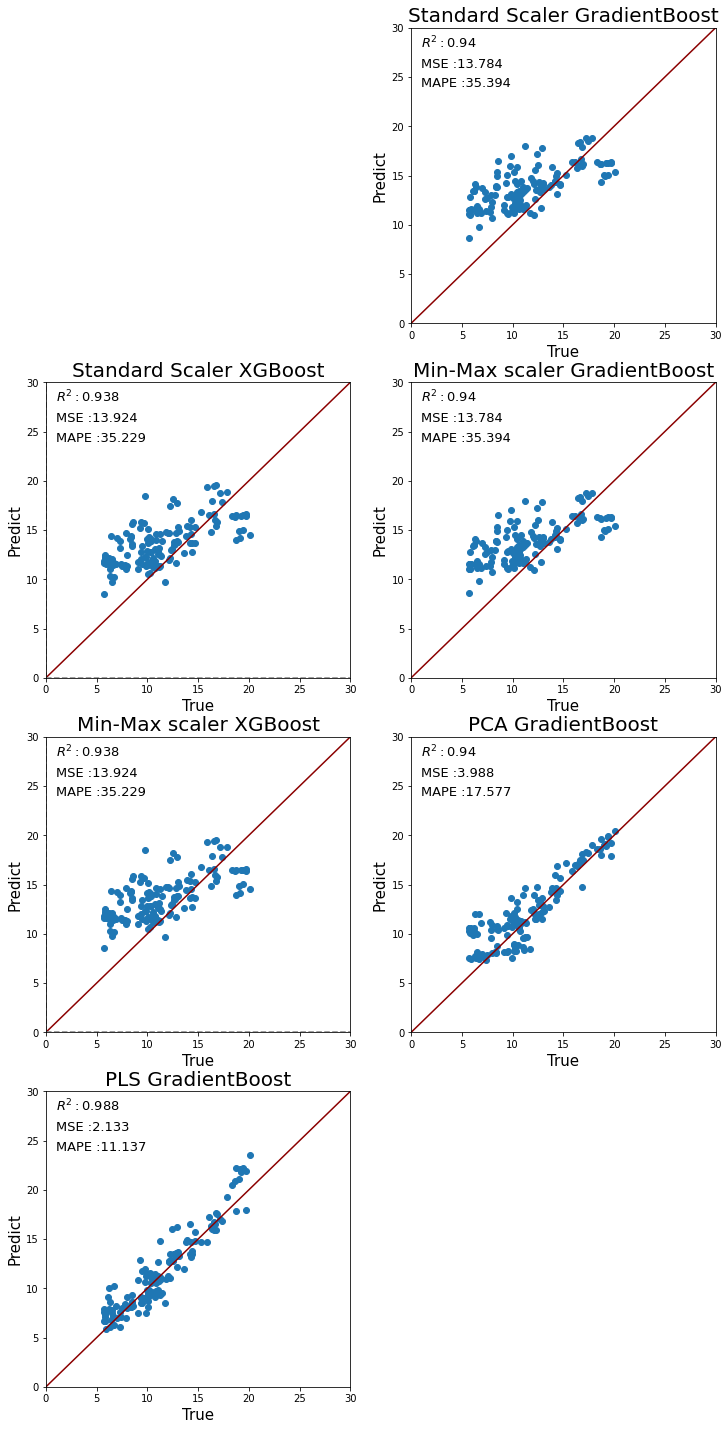

In [37]:
plt.figure(figsize = (12, 25))
plt.subplot(3,1,1)
plt.scatter(test_y, GB_pred[0])
plt.plot([0, 30], [0, 30], color = "darkred")
plt.xlim(0, 30) ; plt.ylim(0, 30)
plt.xlabel("True", fontsize = 15)  ; plt.ylabel("Predict", fontsize = 15)
plt.text(1, 28, r'$R^2 :$' + str(np.round(gb_r2[0], 3)), fontsize = 13)
plt.text(1, 26, "MSE :" + str(MSE(true = test_y, pred = GB_pred[0])), fontsize = 13)
plt.text(1, 24, "MAPE :" + str(MAPE(true = test_y, pred = GB_pred[0])), fontsize = 13)
plt.title(method_name[0] + " GradientBoost", fontsize = 20)
plt.subplot(4,2,2)
plt.scatter(test_y, GB_pred[1])
plt.plot([0, 30], [0, 30], color = "darkred")
plt.xlim(0, 30) ; plt.ylim(0, 30)
plt.xlabel("True", fontsize = 15)  ; plt.ylabel("Predict", fontsize = 15)
plt.text(1, 28, r'$R^2 :$' + str(np.round(gb_r2[1], 3)), fontsize = 13)
plt.text(1, 26, "MSE :" + str(MSE(true = test_y, pred = GB_pred[1])), fontsize = 13)
plt.text(1, 24, "MAPE :" + str(MAPE(true = test_y, pred = GB_pred[1])), fontsize = 13)
plt.title(method_name[1] + " GradientBoost", fontsize = 20)
plt.subplot(4,2,3)
plt.scatter(test_y, xgb_pred[1])
plt.plot([0, 30], [0, 30], color = "darkred")
plt.axhline(0, color = "grey", linestyle = "--")  ; plt.axvline(0, color = "grey", linestyle = "--")
plt.xlim(0, 30) ; plt.ylim(0, 30)
plt.xlabel("True", fontsize = 15)  ; plt.ylabel("Predict", fontsize = 15)
plt.text(1, 28, r'$R^2 :$' + str(np.round(XGB_r2[1], 3)), fontsize = 13)
plt.text(1, 26, "MSE :" + str(MSE(true = test_y, pred = xgb_pred[1])), fontsize = 13)
plt.text(1, 24, "MAPE :" + str(MAPE(true = test_y, pred = xgb_pred[1])), fontsize = 13)
plt.title(method_name[1] + " XGBoost", fontsize = 20)

plt.subplot(4,2,4)
plt.scatter(test_y, GB_pred[2])
plt.plot([0, 30], [0, 30], color = "darkred")
plt.xlim(0, 30) ; plt.ylim(0, 30)
plt.xlabel("True", fontsize = 15)  ; plt.ylabel("Predict", fontsize = 15)
plt.text(1, 28, r'$R^2 :$' + str(np.round(gb_r2[2], 3)), fontsize = 13)
plt.text(1, 26, "MSE :" + str(MSE(true = test_y, pred = GB_pred[2])), fontsize = 13)
plt.text(1, 24, "MAPE :" + str(MAPE(true = test_y, pred = GB_pred[2])), fontsize = 13)
plt.title(method_name[2] + " GradientBoost", fontsize = 20)

plt.subplot(4,2,5)
plt.scatter(test_y, xgb_pred[2])
plt.plot([0, 30], [0, 30], color = "darkred")
plt.axhline(0, color = "grey", linestyle = "--")  ; plt.axvline(0, color = "grey", linestyle = "--")
plt.xlim(0, 30) ; plt.ylim(0, 30)
plt.xlabel("True", fontsize = 15)  ; plt.ylabel("Predict", fontsize = 15)
plt.text(1, 28, r'$R^2 :$' + str(np.round(XGB_r2[2], 3)), fontsize = 13)
plt.text(1, 26, "MSE :" + str(MSE(true = test_y, pred = xgb_pred[2])), fontsize = 13)
plt.text(1, 24, "MAPE :" + str(MAPE(true = test_y, pred = xgb_pred[2])), fontsize = 13)
plt.title(method_name[2] + " XGBoost", fontsize = 20)
plt.subplot(4,2,6)
plt.scatter(test_y, GB_pred[3])
plt.plot([0, 30], [0, 30], color = "darkred")
plt.xlim(0, 30) ; plt.ylim(0, 30)
plt.xlabel("True", fontsize = 15)  ; plt.ylabel("Predict", fontsize = 15)
plt.text(1, 28, r'$R^2 :$' + str(np.round(gb_r2[0], 3)), fontsize = 13)
plt.text(1, 26, "MSE :" + str(MSE(true = test_y, pred = GB_pred[3])), fontsize = 13)
plt.text(1, 24, "MAPE :" + str(MAPE(true = test_y, pred = GB_pred[3])), fontsize = 13)
plt.title(method_name[3] + " GradientBoost", fontsize = 20)
plt.subplot(4,2,7)
plt.scatter(test_y, GB_pred[4])
plt.plot([0, 30], [0, 30], color = "darkred")
plt.xlim(0, 30) ; plt.ylim(0, 30)
plt.xlabel("True", fontsize = 15)  ; plt.ylabel("Predict", fontsize = 15)
plt.text(1, 28, r'$R^2 :$' + str(np.round(gb_r2[4], 3)), fontsize = 13)
plt.text(1, 26, "MSE :" + str(MSE(true = test_y, pred = GB_pred[4])), fontsize = 13)
plt.text(1, 24, "MAPE :" + str(MAPE(true = test_y, pred = GB_pred[4])), fontsize = 13)
plt.title(method_name[4] + " GradientBoost", fontsize = 20)

plt.savefig(Out_path + 'Sum.png')
plt.show()

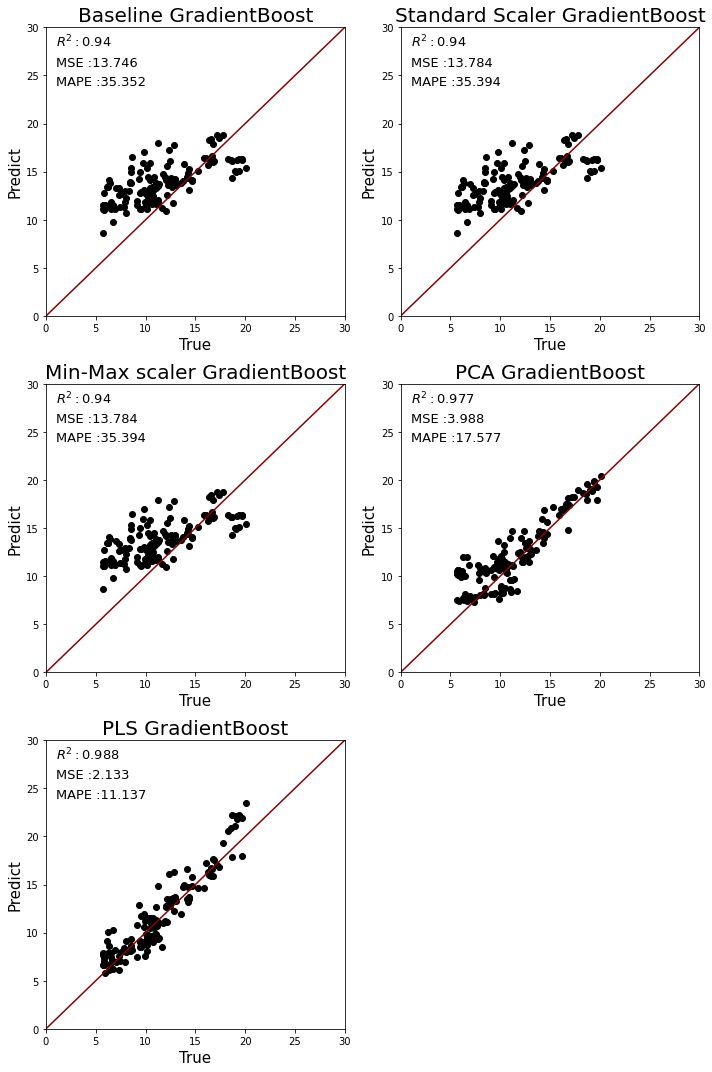

In [38]:
from sklearn.metrics import r2_score

standard_method = ["None", "SS", "MM", "PCA", "PLS"]

plt.figure(figsize = (10, 15))

for i in range(5) :
    plt.subplot(3, 2, i+1)
    plt.scatter(test_y, GB_pred[i], color = "black")
    plt.plot([0, 30], [0, 30], color = "darkred")
    plt.xlim(0, 30) ; plt.ylim(0, 30)
    plt.xlabel("True", fontsize = 15)  ; plt.ylabel("Predict", fontsize = 15)
    plt.text(1, 28, r'$R^2 :$' + str(np.round(gb_r2[i], 3)), fontsize = 13)
    plt.text(1, 26, "MSE :" + str(MSE(true = test_y, pred = GB_pred[i])), fontsize = 13)
    plt.text(1, 24, "MAPE :" + str(MAPE(true = test_y, pred = GB_pred[i])), fontsize = 13)
    plt.title(method_name[i] + " GradientBoost", fontsize = 20)

plt.tight_layout()
plt.savefig(Out_path + 'GB_result.png')
plt.show()

In [39]:
value = np.zeros((5,5,8))

for i in range(5):
    sam = []
    
    sam.append(NSE(true = test_y, pred = OLS_pred_list[i]))
    sam.append(NSE(true = test_y, pred = RF_pred_list[i]))
    sam.append(NSE(true = test_y, pred = ET_pred_list[i]))
    sam.append(NSE(true = test_y, pred = GB_pred[i]))
    sam.append(NSE(true = test_y, pred = ada_pred[i]))
    sam.append(NSE(true = test_y, pred = knn_pred[i]))
    sam.append(NSE(true = test_y, pred = svr_pred[i]))
    sam.append(NSE(true = test_y, pred = xgb_pred[i]))
    
    value[0][i] = np.array(sam)

for i in range(5):
    sam = []
    
    sam.append(d(true = test_y, pred = OLS_pred_list[i]))
    sam.append(d(true = test_y, pred = RF_pred_list[i]))
    sam.append(d(true = test_y, pred = ET_pred_list[i]))
    sam.append(d(true = test_y, pred = GB_pred[i]))
    sam.append(d(true = test_y, pred = ada_pred[i]))
    sam.append(d(true = test_y, pred = knn_pred[i]))
    sam.append(d(true = test_y, pred = svr_pred[i]))
    sam.append(d(true = test_y, pred = xgb_pred[i]))
    
    value[1][i] = np.array(sam)

for i in range(5):
    sam = []
    
    sam.append(MAE(true = test_y, pred = OLS_pred_list[i]))
    sam.append(MAE(true = test_y, pred = RF_pred_list[i]))
    sam.append(MAE(true = test_y, pred = ET_pred_list[i]))
    sam.append(MAE(true = test_y, pred = GB_pred[i]))
    sam.append(MAE(true = test_y, pred = ada_pred[i]))
    sam.append(MAE(true = test_y, pred = knn_pred[i]))
    sam.append(MAE(true = test_y, pred = svr_pred[i]))
    sam.append(MAE(true = test_y, pred = xgb_pred[i]))
    
    value[2][i] = np.array(sam)
    
for i in range(5):
    sam = []
    
    sam.append(RMSE(true = test_y, pred = OLS_pred_list[i]))
    sam.append(RMSE(true = test_y, pred = RF_pred_list[i]))
    sam.append(RMSE(true = test_y, pred = ET_pred_list[i]))
    sam.append(RMSE(true = test_y, pred = GB_pred[i]))
    sam.append(RMSE(true = test_y, pred = ada_pred[i]))
    sam.append(RMSE(true = test_y, pred = knn_pred[i]))
    sam.append(RMSE(true = test_y, pred = svr_pred[i]))
    sam.append(RMSE(true = test_y, pred = xgb_pred[i]))
    
    value[3][i] = np.array(sam)

for i in range(5):
    sam = []
    
    sam.append(PSR(true = test_y, pred = OLS_pred_list[i]))
    sam.append(PSR(true = test_y, pred = RF_pred_list[i]))
    sam.append(PSR(true = test_y, pred = ET_pred_list[i]))
    sam.append(PSR(true = test_y, pred = GB_pred[i]))
    sam.append(PSR(true = test_y, pred = ada_pred[i]))
    sam.append(PSR(true = test_y, pred = knn_pred[i]))
    sam.append(PSR(true = test_y, pred = svr_pred[i]))
    sam.append(PSR(true = test_y, pred = xgb_pred[i]))
    
    value[4][i] = np.array(sam)


In [40]:
rname= ['OLS','RF','ET','GB','Ada','KNN','SVR','XGB']
cname = ['Base','SS','MM',"PCA","PLS"]
xlsx_name = ['NSE','d','MAE','RMSE','PSR']

In [41]:
str(xlsx_name[0])+'.xlsx'

'NSE.xlsx'

In [42]:
pd.DataFrame(list(value)[0].T,index=rname,columns=cname)

,Base,SS,MM,PCA,PLS
OLS,-7.592,-21.904,-2.054,-21.389,-21.402
RF,-0.096,-0.067,-0.067,0.520,0.723
ET,-0.036,-0.042,-0.042,0.682,0.796
GB,0.068,0.065,0.065,0.729,0.855
Ada,-0.516,-0.526,-0.526,0.483,0.510
KNN,-0.195,-0.153,-0.140,-0.150,-0.040
SVR,-0.104,-0.107,-0.099,-0.113,0.082
XGB,0.055,0.055,0.055,0.702,0.806


In [44]:
# for i in range(5):
#     result = pd.DataFrame(list(value)[i].T,index=rname,columns=cname)
#     result.to_excel(Out_path+str(xlsx_name[i])+'.xlsx')

# **Visualization**

In [45]:
x = range(len(test_y))
y = [1]*len(test_y)

## **Predict**

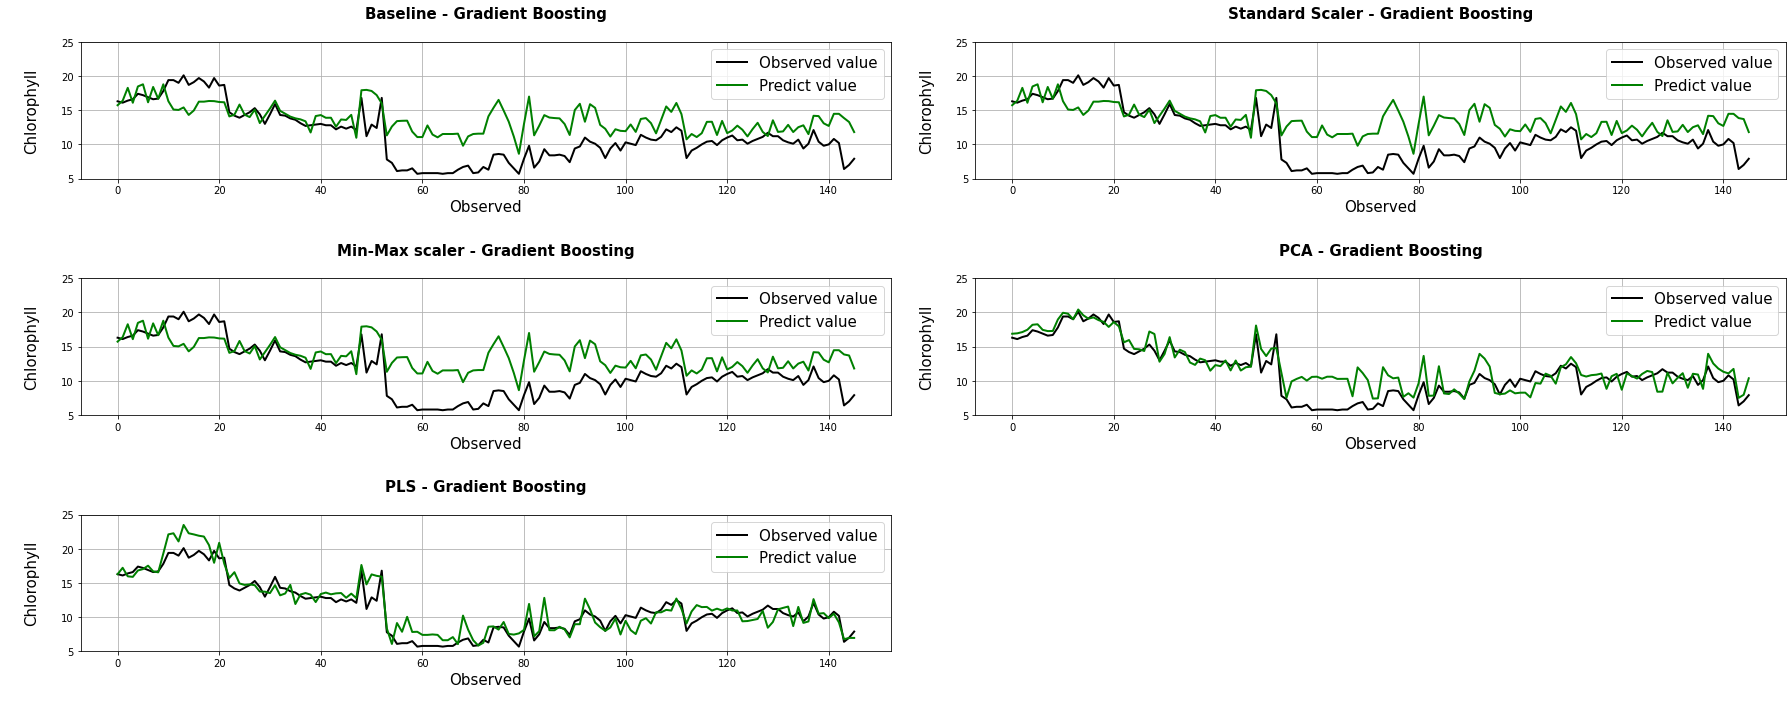

In [46]:
plt.figure(figsize = (25, 10)) 

for i in range(len(GB_pred)) :
    plt.subplot(3, 2, i+1)
    plt.plot(test_y, color = "black", lw = 2, label = "Observed value")
    plt.plot(GB_pred[i], color = "green", lw = 2, label = "Predict value")
    plt.yticks([5, 10, 15, 20, 25], [5, 10, 15, 20, 25])
    plt.ylim(5, 25)
    plt.xlabel("Observed\n", fontsize = 15)
    plt.ylabel("\nChlorophyll\n", fontsize = 15)
    plt.title(method_name[i] + " - Gradient Boosting\n", fontsize = 15, weight = "bold")
    plt.legend(loc = "upper right", fontsize = 15)
    plt.grid(True)


plt.tight_layout()
plt.show()

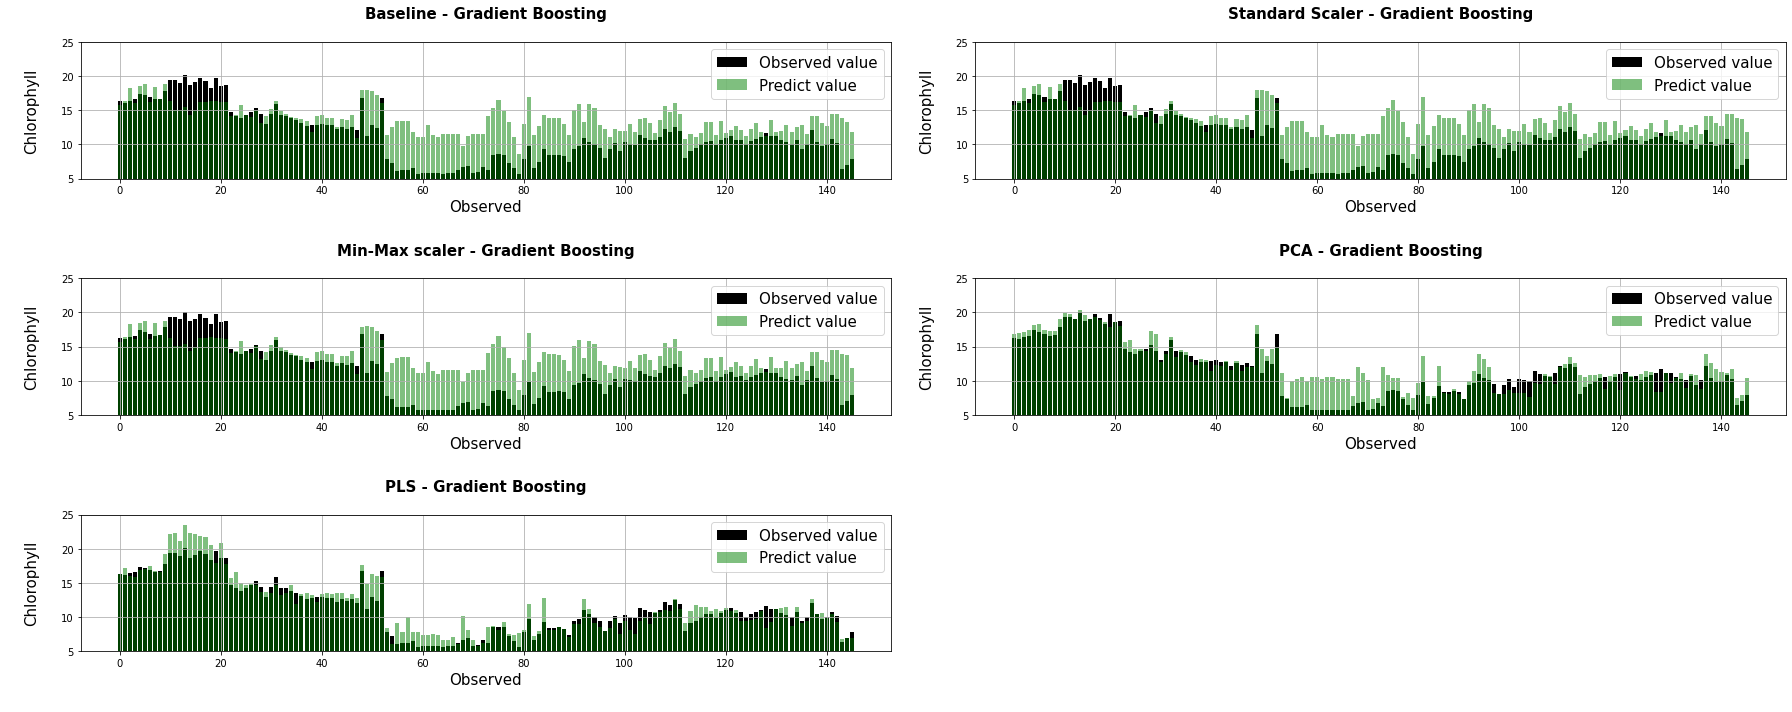

In [47]:
plt.figure(figsize = (25, 10)) 

for i in range(len(GB_pred)) :
    plt.subplot(3, 2, i+1)
    plt.bar(x = x, height = test_y, color = "black", label = "Observed value", alpha = 1)
    plt.bar(x = x, height = GB_pred[i], color = "green", label = "Predict value", alpha = 0.5)
    plt.yticks([5, 10, 15, 20, 25], [5, 10, 15, 20, 25])
    plt.ylim(5, 25)
    plt.xlabel("Observed\n", fontsize = 15)
    plt.ylabel("\nChlorophyll\n", fontsize = 15)
    plt.title(method_name[i] + " - Gradient Boosting\n", fontsize = 15, weight = "bold")
    plt.legend(loc = "upper right", fontsize = 15)
    plt.grid(True)


plt.tight_layout()
plt.show()

## **Residual**

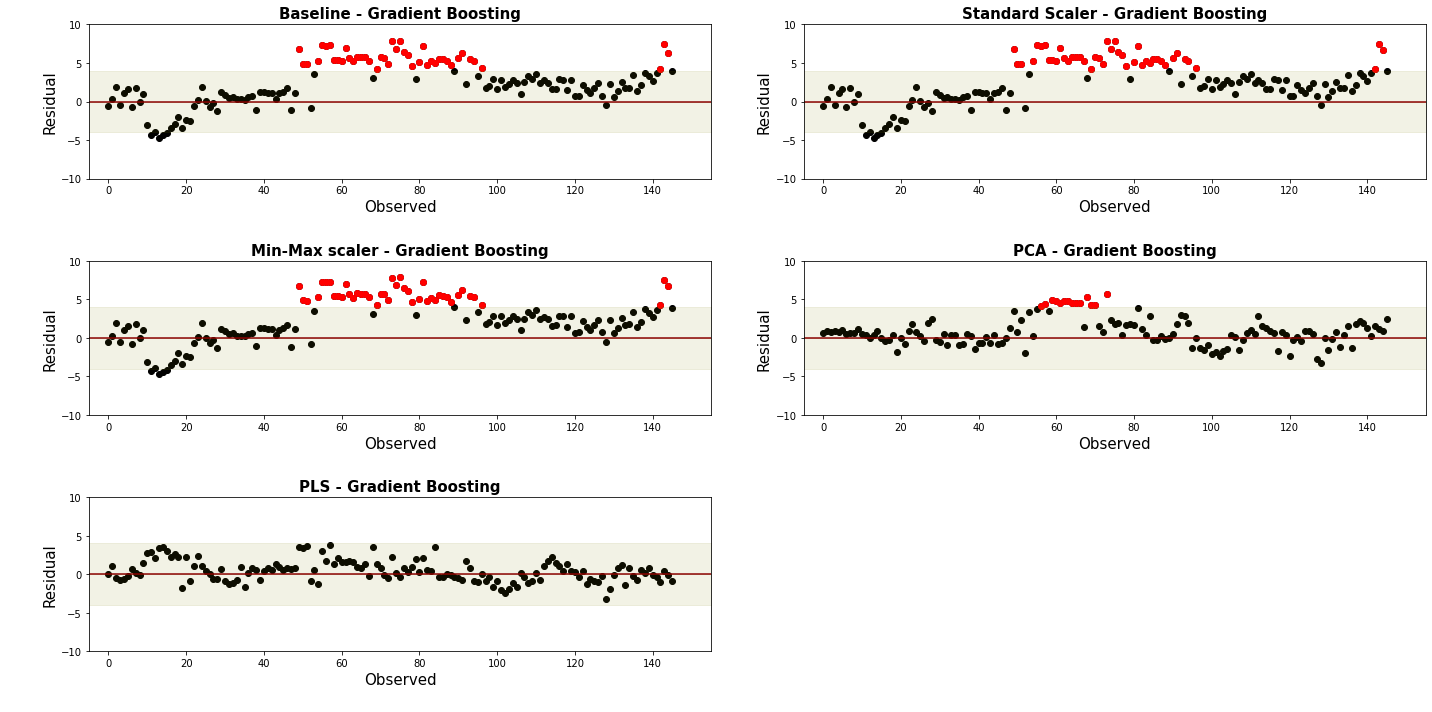

In [48]:
plt.figure(figsize = (20, 10)) 

for i in range(len(GB_pred)) :
    
    resid = np.array(GB_pred[i]- test_y)
    threshold = resid > 4
    
    plt.subplot(3, 2, i+1)
    plt.scatter(x = np.array(x), y = resid, color = "black")
    plt.scatter(x = np.array(x)[threshold], y = resid[threshold] , color = "red")
    plt.ylim(-10, 10) ; plt.xlim(-5, 155)
    
    
    plt.axhline(0, color = "darkred")
    plt.fill_between([-10, -10, 160, 160], [-4, 4, 4, -4], alpha=0.1, color = "olive")
    plt.fill_between([-10, -10, 160, 160], [4, -4, -4, 4], alpha=0.1, color = "olive")
    
    plt.ylabel("\n\nResidual", fontsize = 15)
    plt.xlabel("Observed\n", fontsize = 15)
    plt.title(method_name[i] + " - Gradient Boosting", fontsize = 15, weight = "bold")
    
#     plt.grid(True)


plt.tight_layout()
plt.show()

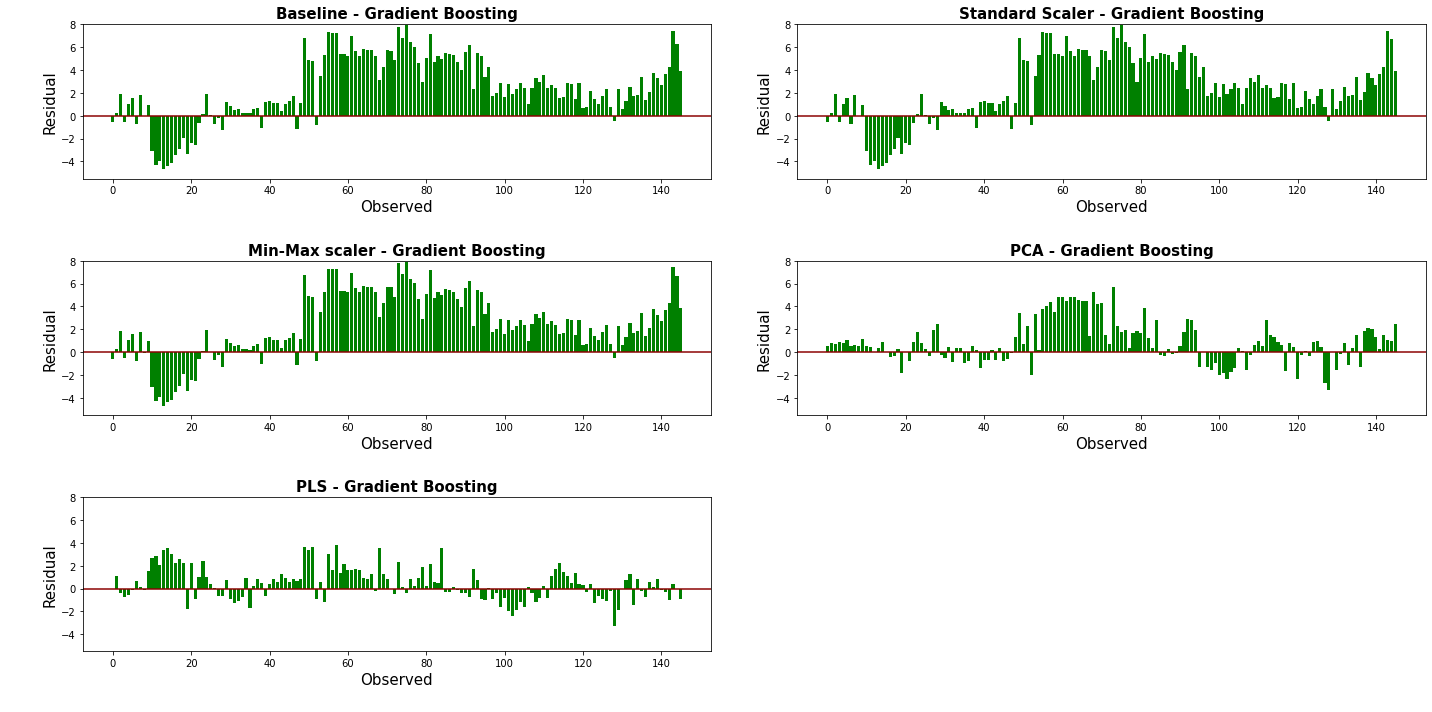

In [49]:
plt.figure(figsize = (20, 10)) 

for i in range(len(GB_pred)) :
    plt.subplot(3, 2, i+1)
    resid = np.array(GB_pred[i]- test_y)
    plt.bar(x = x, height = resid, color = "green")
    plt.axhline(0, color = "darkred")
    plt.ylim(-5.5, 8)
    
    plt.ylabel("\n\nResidual", fontsize = 15)
    plt.xlabel("Observed\n", fontsize = 15)
    plt.title(method_name[i] + " - Gradient Boosting", fontsize = 15, weight = "bold")
    
#     plt.grid(True)


plt.tight_layout()
plt.show()

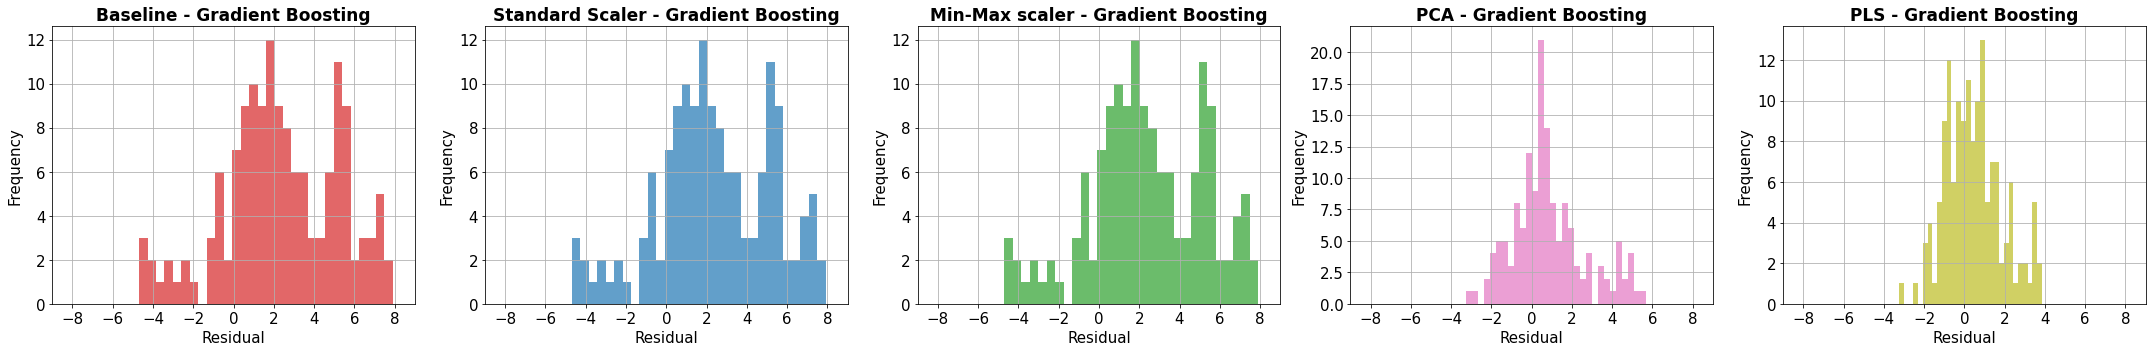

In [50]:
plt.figure(figsize = (30, 5)) 

# plt.plot(test_y, color = "black", lw = 2, label = "chlorophyll (actual value)")
colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:pink', 'tab:olive']

for i in range(len(GB_pred)) :
    plt.subplot(1,5,i+1)
    plt.hist(GB_pred[i]-test_y, alpha = .7, bins = 30, color = colors[i])
    plt.xlim(-9, 9)
    plt.xlabel("Residual", fontsize = 15) ; plt.ylabel("Frequency", fontsize = 15)
    plt.xticks(fontsize = 15) ; plt.yticks(fontsize = 15)
    plt.title(method_name[i] + " - Gradient Boosting", fontsize = 17, weight = "bold")
    plt.grid(True)

# plt.axvline(0, color = "black", lw = 1)


plt.tight_layout()
plt.show()

## **Variable Importance**

In [57]:
st = HS_st(train_X = train_X, test_X = test_X, train_y = train_y, 
           method = "SS",
           head = 50, tail = 50)
st_train_X = st["train X"]  ; st_test_X = st["test X"]
print(st_train_X.shape, st_test_X.shape)

(338, 451) (146, 451)


In [64]:
grbt = GradientBoostingRegressor(random_state = 30)
grbt_fit = grbt.fit(st_train_X, train_y)
grbt_pred = grbt_fit.predict(st_test_X)
vi = grbt_fit.feature_importances_

In [65]:
max(vi)

0.08881382770921431

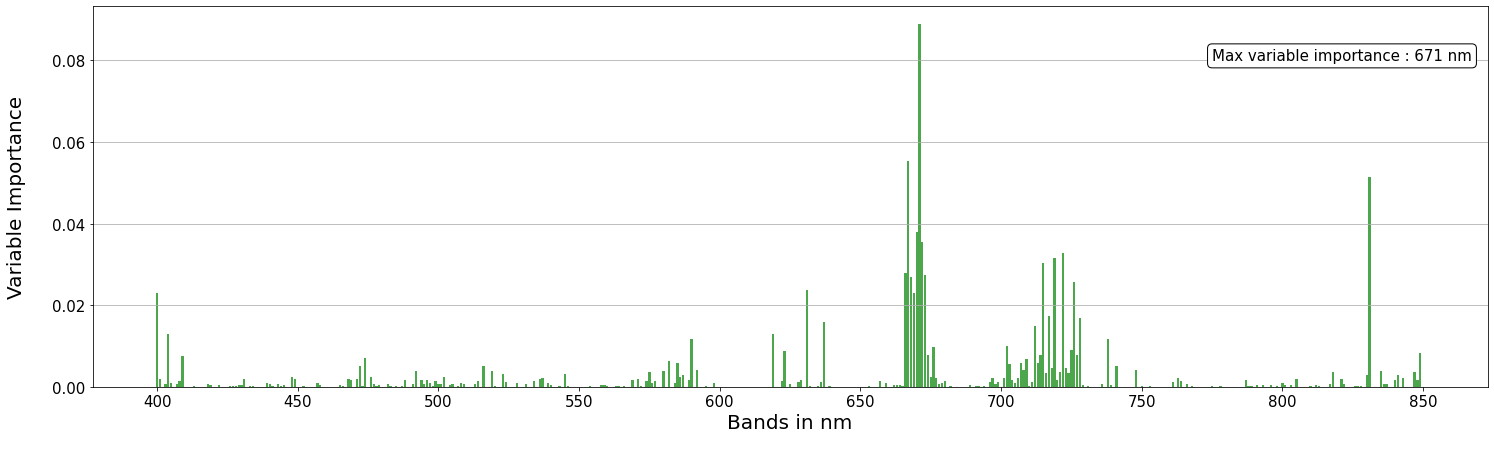

In [71]:
plt.figure(figsize = (25, 7)) 
plt.bar(x = range(451), height = vi, color = "green", alpha = 0.7)
plt.xlabel("Bands in nm\n", fontsize = 20) ; plt.ylabel("Variable Importance\n", fontsize = 20)
plt.xticks([0, 50, 100, 150, 200, 250, 300, 350, 400, 450], [400, 450, 500, 550, 600, 650, 700, 750, 800, 850], fontsize = 15)
plt.text(375, 0.08, "Max variable importance : " + str(np.where(vi == max(vi))[0][0] + 400) + " nm", fontsize = 15,
         bbox = {'facecolor':'w','edgecolor':'black','boxstyle':'round'})
# plt.ylim(0,0.02)
plt.yticks(fontsize = 15)
plt.grid(True, axis = "y")
plt.show()

In [40]:
# plt.figure(figsize = (30, 2)) 

# plt.scatter(x = x, y = [0]*len(test_y), c = test_y-test_y, cmap="BuGn", marker = "s", s = 100, label = "chlorophyll (resid)", edgecolor="white")
# plt.text(-6, 0, "True", weight = "bold")


# for i in range(len(GB_pred)) :
#     plt.scatter(x = x, y = [(i+1)*0.1]*len(test_y), c = GB_pred[i]-test_y, cmap="BuGn", marker = "s", s = 100, label = "chlorophyll (resid)", edgecolor="white")
#     plt.text(-6.5, (i+1)*0.095, standard_method[i] + " GB", weight = "bold")



# plt.tight_layout()
# plt.show()

In [41]:
# plt.figure(figsize = (25, 20)) 

# plt.subplot(6, 1, 1)
# plt.scatter(x = x, y = y, c = test_y, cmap="BuGn", marker = "s", s = 2000, label = "chlorophyll (color)")
# plt.plot(test_y, color = "black", lw = 2, label = "chlorophyll (value)")
# plt.yticks([5, 10, 15, 20, 25], [5, 10, 15, 20, 25])
# plt.ylim(0, 30)
# plt.text(130, 27, "Actual value", fontsize = 15, weight = "bold")
# plt.legend(["chlorophyll (value)", "chlorophyll (color)"], bbox_to_anchor = (1.0, 0.85), fontsize = 15, scatterpoints = len(test_y), markerscale = 0.3)
# plt.grid(True)


# for i in range(len(GB_pred)) :
#     plt.subplot(6, 1, i+2)
#     plt.scatter(x = x, y = y, c = GB_pred[i], cmap="BuGn", marker = "s", s = 2000, label = "chlorophyll (color)")
#     plt.plot(GB_pred[i], color = "black", lw = 2, label = "chlorophyll (value)")
#     plt.yticks([5, 10, 15, 20, 25], [5, 10, 15, 20, 25])
#     plt.ylim(0, 30)
#     plt.text(130, 27, standard_method[i] + " Gradient Boosting", fontsize = 15, weight = "bold")
#     plt.legend(["chlorophyll (value)", "chlorophyll (color)"], bbox_to_anchor = (0.99, 0.85), fontsize = 15, scatterpoints = len(test_y), markerscale = 0.3)
#     plt.grid(True)


# plt.tight_layout()
# plt.show()

In [42]:
# plt.figure(figsize = (25, 10)) 

# # plt.plot(test_y, color = "black", lw = 2, label = "chlorophyll (actual value)")

# for i in range(len(GB_pred)) :
#     plt.plot(GB_pred[i]-test_y, lw = 2, label = "chlorophyll (predict value)")

# plt.legend(bbox_to_anchor = (0.99, 0.85), fontsize = 15, scatterpoints = len(test_y), markerscale = 0.3)
# plt.grid(True)


# plt.tight_layout()
# plt.show()